# Advance Linear Regression
#### In this Advance  assigmenet we'll build a Lenear regression to predict Sales price of house 


#### 1. First will try to build a model with Multiple linear regression and
#### 2. We'll try Ridge and Lasso Linear Regression

In [3]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE , SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, metrics
from sklearn.metrics import r2_score, mean_squared_error
import os
import warnings 
warnings.filterwarnings('ignore')

#### Below are some common function used for build model

In [4]:
# Find NaN values using isna() or isnull()
def print_missing_values(df):
    missing_values = df.isna().sum()
    # Filter columns with missing values and print their names and counts
    columns_with_missing_values = missing_values[missing_values > 0]
    print("\nColumns with Missing Values:")
    for column_name, missing_count in columns_with_missing_values.items():
        print(f"{column_name}: {missing_count} missing values")
        
def replace_na_with_zero(df, column_names):
    # Iterate through the specified column names
    for column_name in column_names:
            # Replace "NA" strings with 0 in the selected column
            df[column_name].fillna(0)
            df[column_name] = df[column_name].replace("NA", 0)
            df[column_name] = df[column_name].replace("", 0)
            df[column_name] = df[column_name].replace(" ", 0)
            
    return df

def create_dummy_columns(df, column_names):
    # Iterate through the specified column names
    for column_name in column_names:
        if column_name in df.columns:
            # Replace "NA" strings with 0 in the selected column
            dummy_df = pd.get_dummies(df[column_name], prefix=column_name)
            dummy_df.drop(dummy_df.columns[-1], axis=1, inplace=True)
            df = pd.concat([df, dummy_df], axis=1)
            df.drop(column_name, axis=1, inplace=True)

    return df



In [5]:
def train_print_summary(column_list,X_train,y_train):
    X_train_lm = X_train[column_list]
    X_train_lm = sm.add_constant(X_train_lm)    
    lr = sm.OLS(y_train, X_train_lm).fit()
    print(lr.summary())
    y_train_cnt = lr.predict(X_train_lm)
    fig = plt.figure()
    sns.distplot((y_train - y_train_cnt), bins = 20)
    fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
    plt.xlabel('Errors', fontsize = 18)
    return lr

# Check for the VIF values of the feature variables.   
def vif_print_summary(column_list,X_train):
    X_train_vif=X_train[column_list]
    vif = pd.DataFrame()
    vif['Features'] = X_train_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    
# Check for the VIF values of the feature variables.   
def vif_print_summary(column_list,X_train):
    X_train_vif=X_train[column_list]
    vif = pd.DataFrame()
    vif['Features'] = X_train_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    
#Get k best feature for model 
def select_k_best_with_lr(X_train, y_train, n_features_to_select):
    model = LinearRegression()
    selector = SelectKBest(score_func=f_regression, k=n_features_to_select)
    X_train_selected = selector.fit_transform(X_train, y_train)
    model.fit(X_train_selected, y_train)
    return model, selector.get_support()

#rfe method to get best model with number features not suggested
def rfe_with_lr(X_train, y_train):
    model = LinearRegression()
    rfe = RFE(model)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    model.fit(X_train_rfe, y_train)
    return model, rfe.support_
#rfe method to get best model with number features suggested
def rfe_with_lr_x(X_train, y_train, n_features_to_select):
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    model.fit(X_train_rfe, y_train)
    return model, rfe.support_


In [6]:
lm = LinearRegression()
def RFE_func(train_x, train_y,feature_cnt):    
    lm.fit(train_x, train_y)
    #print(lm)
    rfe = RFE(lm, n_features_to_select=feature_cnt)
    rfe = rfe.fit(train_x, train_y)
    list(zip(train_x.columns,rfe.support_,rfe.ranking_))
    return rfe #list(zip(train_x.columns,rfe.support_,rfe.ranking_))

def build_model(train_y,train_x):

    train_x=train_x.drop(['const'],axis=1)
    train_x=sm.add_constant(train_x_rfe)
    lm = sm.OLS(train_y,train_x).fit()
    print(lm.summary())
    return lm

def check_VIF(req_df):
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = req_df.copy(deep=True)
    X=X.drop(['const'],axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
    #print(vif)

## 1. Linear regression


In [7]:
records = pd.read_csv('train.csv')
records['SalePriceByGrLivArea']= (records['SalePrice'] / records['GrLivArea']).round(0)


In [8]:
list_of_numeric_columns=[
    'LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
    'LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea'
    ,'MiscVal','MoSold','SalePrice'
]
records_withoutna=replace_na_with_zero(records,list_of_numeric_columns)

In [9]:
records_withoutna['GarageYrBlt'] = records_withoutna['GarageYrBlt'].replace("NA", 1800)

In [10]:
scaler = MinMaxScaler()

In [11]:
columns_needing_dummy_variables=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig',
                                'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual',
                                'OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
                                'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                                'Heating','HeatingQC','CentralAir','Electrical','BsmtFullBath','BsmtHalfBath','FullBath',
                                'HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces',
                                'FireplaceQu','GarageType','GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive',
                                'PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
records_withoutna_dummy=create_dummy_columns(records_withoutna,columns_needing_dummy_variables)


In [12]:
np.random.seed(0)
df_train, df_test = train_test_split(records_withoutna_dummy, train_size = 0.8, test_size = 0.2, random_state = 100)


In [13]:
scaled_columns=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','GarageYrBlt',
'YearBuilt','YearRemodAdd','YrSold']
scaler.fit(df_train[scaled_columns])
df_train[scaled_columns] = scaler.transform(df_train[scaled_columns])
df_test[scaled_columns] = scaler.transform(df_test[scaled_columns])

In [14]:
df_test.to_csv('df_test.csv', index=False)
df_train.to_csv('df_train.csv', index=False)

In [15]:
train_y = df_train.pop('SalePrice')
train_x = df_train

R2 and Error Terms on Training Data
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     413.3
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:03:37   Log-Likelihood:                -13098.
No. Observations:                1168   AIC:                         2.630e+04
Df Residuals:                    1117   BIC:                         2.656e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

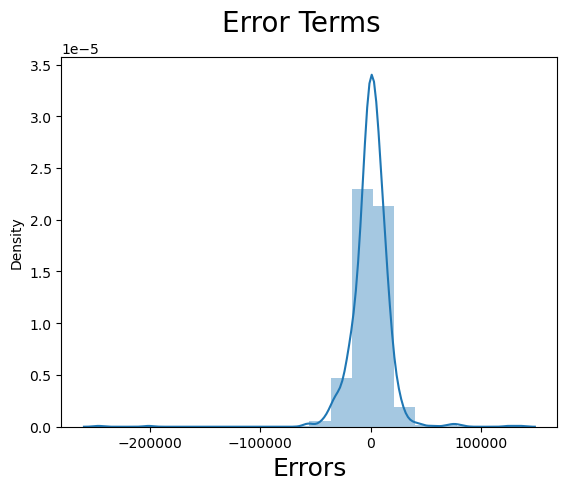

In [16]:
# Assuming you have X_train and y_train dataframes
n_features_to_select = 50  # Specify the number of features to select
selected_model, selected_features_mask = select_k_best_with_lr(train_x, train_y, n_features_to_select)
selected_features = train_x.columns[selected_features_mask]

print('R2 and Error Terms on Training Data')
lr=train_print_summary(selected_features,train_x,train_y)


# rfe=RFE_func(train_x,train_y,50)
# col=train_x.columns[rfe.support_]
# train_x_rfe = train_x[col]
# train_x_rfe=sm.add_constant(train_x_rfe)
# lm=build_model(train_y,train_x_rfe)
# check_VIF(train_x_rfe)

In [17]:
# train_x_rfe=train_x_rfe.drop(['Exterior1st_CBlock','Exterior2nd_CBlock','GrLivArea','MiscFeature_Gar2','BsmtCond_Po','RoofMatl_Roll','OverallCond_1',
#                               'PoolArea','PoolQC_Fa','PoolQC_Ex','RoofMatl_CompShg','RoofMatl_WdShake','RoofMatl_Tar&Grv','Foundation_PConc'
#                               ,'Foundation_Slab','Foundation_BrkTil','Foundation_Stone','TotalBsmtSF','KitchenAbvGr_1','Foundation_CBlock','3SsnPorch','YearBuilt','GarageArea']
#                              ,axis=1)
# lm=build_model(train_y,train_x_rfe)
# check_VIF(train_x_rfe)

In [18]:
print("Selected features:")
vif_print_summary(selected_features,train_x)

Selected features:
                Features     VIF
7              GrLivArea  697.49
5               1stFlrSF  396.64
6               2ndFlrSF  154.12
0              YearBuilt   65.01
36            HalfBath_0   61.63
8            GarageYrBlt   60.43
12  SalePriceByGrLivArea   55.52
37            HalfBath_1   38.26
22   Exterior1st_VinylSd   36.41
23   Exterior2nd_VinylSd   35.86
9             GarageArea   35.65
4            TotalBsmtSF   28.20
35            FullBath_2   20.42
34            FullBath_1   19.58
41          Fireplaces_0   10.49
28      Foundation_PConc   10.09
1           YearRemodAdd    9.61
42          Fireplaces_1    7.73
27     Foundation_CBlock    6.76
24       MasVnrType_None    5.52
26          ExterQual_Gd    4.69
3             BsmtFinSF1    4.46
21         OverallCond_5    4.42
45     GarageType_Attchd    4.28
39        KitchenQual_Gd    4.24
13         MSSubClass_60    3.99
32          HeatingQC_Ex    3.61
2             MasVnrArea    3.18
47          GarageCars_1

r2_train_lr 0.9864975637411219
r2_test_lr -5.046129323344112
rss1_lr 98974140290.92873
rss2_lr 11350364298653.535
mse_train_lr 84738133.81072664
mse_test_lr 38871110611.82718


Text(0.5, 0, 'Errors')

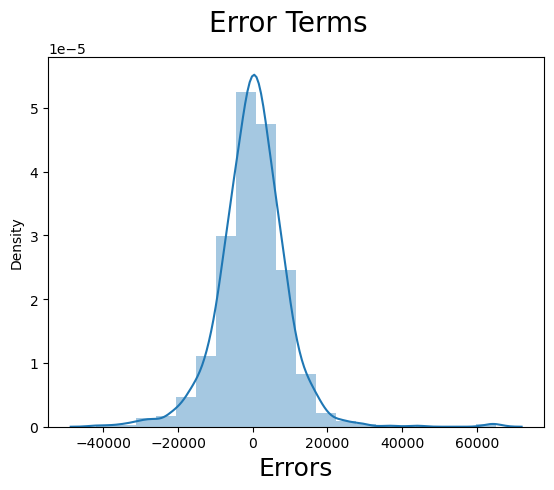

In [19]:
test_y = df_test.pop('SalePrice')
test_x = df_test

lm.fit(train_x, train_y)
y_pred_train = lm.predict(train_x)
y_pred_test = lm.predict(test_x)

metric = []
r2_train_lr = r2_score(train_y, y_pred_train)
print('r2_train_lr',r2_train_lr)
metric.append(round(r2_train_lr,2))

r2_test_lr = r2_score(test_y, y_pred_test)
print('r2_test_lr',r2_test_lr)
metric.append(r2_test_lr)


rss1_lr = np.sum(np.square(train_y - y_pred_train))
print('rss1_lr',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(test_y - y_pred_test))
print('rss2_lr',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(train_y, y_pred_train)
print('mse_train_lr',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(test_y, y_pred_test)
print('mse_test_lr',mse_test_lr)
metric.append(mse_test_lr**0.5)




fig = plt.figure()
sns.distplot((train_y - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)



In [20]:
#Alpha Parameter list
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,0.15, 
 0.2, 0.25,0.3,0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

print(train_x.shape)
print( train_y.shape)

(1168, 304)
(1168,)


## Ridge Linear Regression


In [21]:

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(train_x, train_y) 

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.15, 0.2,
                                   0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7,
                                   0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,
                                   8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [22]:
print(model_cv.best_params_)



{'alpha': 0.05}


In [23]:
alpha =model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(train_x, train_y)

#Coefficient List
print(ridge.coef_)

[-6.65869509e-01  5.69328173e+03  2.45478792e+04  6.26933373e+03
 -2.23053336e+03  1.58270659e+04  3.03673601e+04  7.88731369e+03
  8.92514905e+02  3.02952857e+04  2.62681222e+05  1.04947063e+05
  1.99370581e+03  2.59901099e+05 -2.39036095e+02 -7.69672347e+03
 -5.17843268e+03  4.36444504e+03 -1.90148529e+03  1.31434798e+04
  1.02960224e+03 -7.66336497e+04  3.79016449e+03 -1.85581115e+03
  6.63440443e+02  1.47829117e+03 -4.96618286e+03 -1.24282354e+03
  6.46539376e+03 -4.40914999e+03 -1.04467137e+03  1.09396130e+04
  2.03223972e+03 -1.02729856e+04  1.22538003e+03 -2.80545730e+03
  5.28280098e+03 -6.06387747e+03  1.43403914e+04  9.11044312e+03
  1.20412676e+04 -3.03600467e+03  8.97911576e+02 -3.53729167e+03
 -1.30536163e+04  3.36240447e+03 -1.17811009e+02 -2.08202318e+03
  1.33281609e+03 -4.54629757e+03 -4.48458910e+03 -3.88628007e+03
 -5.08312900e+03 -4.54700879e+02  1.59309434e+03 -4.34159277e+02
 -1.27449771e+03 -7.35945916e+03 -1.27205799e+03  5.70108028e+03
  9.59171625e+03  4.28143

r2_train_lr 0.9853547722856789
r2_test_lr 0.920970927118679
rss1_lr 107350910206.05545
rss2_lr 148360830444.77435
mse_train_lr 91910025.86134884
mse_test_lr 508085035.76977515


Text(0.5, 0, 'Errors')

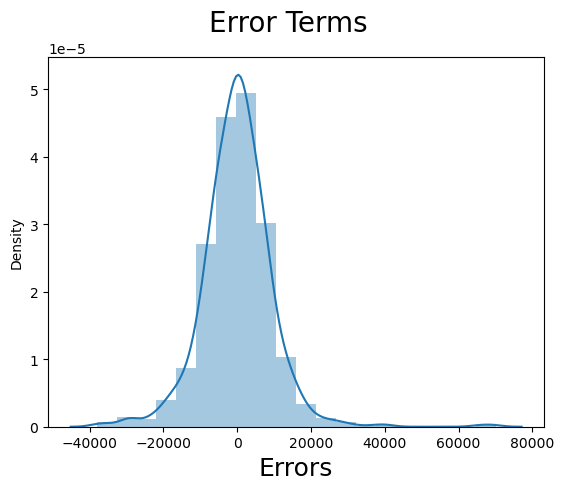

In [24]:
# Lets calculate some metrics such as R2 score, RSS and RMSE ridge
y_pred_train = ridge.predict(train_x)
y_pred_test = ridge.predict(test_x)

metric2 = []
r2_train_lr = r2_score(train_y, y_pred_train)
print('r2_train_lr',r2_train_lr)
metric2.append(round(r2_train_lr,2))

r2_test_lr = r2_score(test_y, y_pred_test)
print('r2_test_lr',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(train_y - y_pred_train))
print('rss1_lr',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(test_y - y_pred_test))
print('rss2_lr',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(train_y, y_pred_train)
print('mse_train_lr',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(test_y, y_pred_test)
print('mse_test_lr',mse_test_lr)
metric2.append(mse_test_lr**0.5)


fig = plt.figure()
sns.distplot((train_y - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

## Lasso Linear Regression

In [25]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(train_x, train_y) 

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.15, 0.2,
                                   0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7,
                                   0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,
                                   8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [26]:
print(model_cv.best_params_)

{'alpha': 50}


In [27]:
alpha =model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(train_x, train_y) 

Lasso(alpha=50)

r2_train_lr 0.9771346632438893
r2_test_lr 0.9530358757941984
rss1_lr 167605090259.96014
rss2_lr 88165484096.56354
mse_train_lr 143497508.78421244
mse_test_lr 301936589.3717929


Text(0.5, 0, 'Errors')

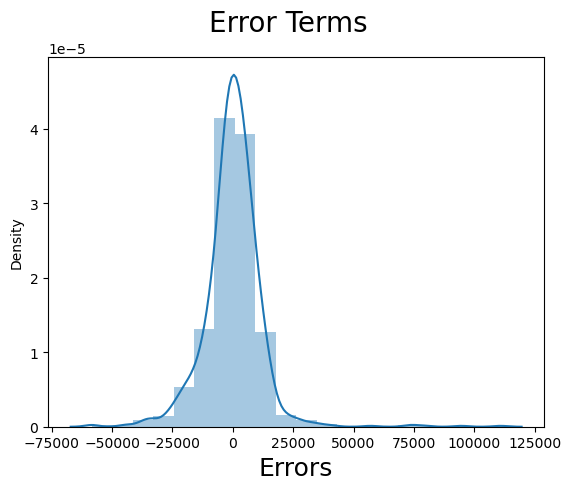

In [28]:
# Lets calculate some metrics such as R2 score, RSS and RMSE lasso
y_pred_train = lasso.predict(train_x)
y_pred_test = lasso.predict(test_x)

metric3 = []
r2_train_lr = r2_score(train_y, y_pred_train)
print('r2_train_lr',r2_train_lr)
metric3.append(round(r2_train_lr,2))

r2_test_lr = r2_score(test_y, y_pred_test)
print('r2_test_lr',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(train_y - y_pred_train))
print('rss1_lr',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(test_y - y_pred_test))
print('rss2_lr',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(train_y, y_pred_train)
print('mse_train_lr',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(test_y, y_pred_test)
print('mse_test_lr',mse_test_lr)
metric3.append(mse_test_lr**0.5)


fig = plt.figure()
sns.distplot((train_y - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [29]:
print(lasso.coef_)

[-1.19814209e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.58145124e+03  1.50647240e+04  0.00000000e+00  0.00000000e+00
  1.18589354e+03  0.00000000e+00  5.42267112e+04  0.00000000e+00
 -1.06895060e+04  4.95494731e+05 -0.00000000e+00 -0.00000000e+00
 -1.39994867e+02  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  3.60214106e+02  1.49810583e+03 -0.00000000e+00  8.76718648e+02
  0.00000000e+00 -0.00000000e+00  2.35427957e+03  6.73732355e+03
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -7.19015227e+02
  0.00000000e+00 -5.57131639e+03  4.61209850e+03  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -1.01866141e+03
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -3.61633081e+03 -9.45570401e+02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -4.68398720e+02  2.69070821e+03  0.00000000e+00
  0.00000000e+00  0.00000

In [30]:
# List of variable with its coefficients Ridge
coef_magnitudes = abs(ridge.coef_)
feature_names = train_x.columns
sorted_indices = coef_magnitudes.argsort()[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_coefficients = [ridge.coef_[i] for i in sorted_indices]
for feature, coef in zip(sorted_features, sorted_coefficients):
    print(f"{feature}, : {round(coef,2)}")


RoofMatl_ClyTile, : -392512.72
Condition2_PosN, : -290005.87
1stFlrSF, : 262681.22
GrLivArea, : 259901.1
2ndFlrSF, : 104947.06
PoolQC_Ex, : 94061.21
PoolQC_Fa, : 87673.85
PoolArea, : -76633.65
BsmtFullBath_0, : 43320.4
Functional_Sev, : -42581.54
BsmtFullBath_1, : 41603.43
OverallQual_5, : -40059.36
OverallQual_6, : -39666.62
OverallQual_7, : -38977.54
OverallQual_8, : -38005.84
BsmtFullBath_2, : 37203.04
OverallQual_2, : -36503.4
RoofMatl_Metal, : -36427.1
Heating_OthW, : -35478.05
OverallQual_4, : -35471.44
Exterior1st_BrkComm, : 32323.59
OverallQual_3, : -31855.26
BsmtFinSF1, : 30367.36
TotalBsmtSF, : 30295.29
ExterCond_Ex, : -28863.26
BsmtHalfBath_0, : 28819.14
BsmtHalfBath_1, : 28610.93
Condition2_Feedr, : 27100.27
RoofMatl_WdShake, : -26199.74
BedroomAbvGr_1, : 25218.46
LotArea, : 24547.88
OverallQual_9, : -22539.28
BedroomAbvGr_2, : 22520.1
BedroomAbvGr_3, : 22074.85
Condition2_Artery, : 21680.57
Condition2_RRAn, : 21361.41
Functional_Maj1, : -20099.86
BedroomAbvGr_4, : 19816.77

In [31]:
# List of variable with its coefficients Lasso
coef_magnitudes1 = abs(lasso.coef_)
feature_names = train_x.columns
sorted_indices = coef_magnitudes1.argsort()[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_coefficients = [ridge.coef_[i] for i in sorted_indices]
for feature, coef in zip(sorted_features, sorted_coefficients):
    print(f"{feature}, : {round(coef,2)}")

GrLivArea, : 259901.1
RoofMatl_ClyTile, : -392512.72
Condition2_PosN, : -290005.87
1stFlrSF, : 262681.22
PoolQC_Ex, : 94061.21
Neighborhood_NoRidge, : 9178.12
MasVnrArea, : 15827.07
BedroomAbvGr_5, : 6518.79
FullBath_1, : -15930.95
TotRmsAbvGrd_3, : -4153.47
LowQualFinSF, : 1993.71
FullBath_2, : -15355.96
OverallQual_5, : -40059.36
OverallQual_6, : -39666.62
HouseStyle_SFoyer, : -8822.19
BsmtQual_Ex, : 4488.1
Neighborhood_StoneBr, : 10047.62
Fireplaces_2, : 7587.35
TotRmsAbvGrd_10, : 17915.03
OverallQual_8, : -38005.84
OverallQual_7, : -38977.54
KitchenQual_Ex, : 6692.32
ExterQual_Ex, : 3251.85
MSSubClass_60, : 10939.61
HouseStyle_2.5Fin, : -1633.88
Functional_Maj1, : -20099.86
BsmtExposure_Gd, : 3865.68
KitchenAbvGr_1, : 11593.54
MSSubClass_120, : -6063.88
HouseStyle_1.5Fin, : 7641.22
Neighborhood_IDOTRR, : 3799.26
GarageCars_3, : 10294.81
RoofStyle_Flat, : -10079.46
MSSubClass_160, : 14340.39
HalfBath_1, : -681.01
Exterior2nd_ImStucc, : 12914.91
HouseStyle_2Story, : 856.35
TotRmsAbvG